# **Credit Card Default Prediction and Sentiment Classification using Machine Learning**

### **Project Scope and Requirements**

This project is part of the **Terminal Assessment** for the *Data Mining and Machine Learning* module in the MSc Data Analytics program. The assessment requires the development of a complete data mining solution, incorporating the full lifecycle of machine learning: from data preprocessing and model development to critical evaluation and reporting.

As per the brief, the project involves:
- Selecting **two datasets** (not necessarily related),
- Applying **two machine learning models per dataset** (total of four experiments),
- Performing data preprocessing, model tuning, evaluation, and critical analysis,
- Presenting insights through visualizations and statistical measures,
- Submitting both code (Portfolio of Studies) and a written Research Paper following IEEE or ACM standards.

### **Dataset Selection and Justification**

Two distinct and widely-used datasets were selected for this project:

1. **Credit Card Default Prediction Dataset** (UCI Repository)  
   Predicts the likelihood of default on the next month’s credit card payment using financial and demographic data of 30,000 clients from Taiwan.

2. **Airline Twitter Sentiment Dataset** (Kaggle)  
   Performs sentiment analysis on tweets related to major U.S. airlines, classifying them as positive, neutral, or negative.

These datasets were chosen based on the following criteria:
- Substantial volume of records (10,000+)
- Diverse domains (finance and NLP)
- Structured vs unstructured features
- Practical relevance for business applications
- Clear supervised learning tasks with labeled outcomes

---

## **Credit Card Default Prediction**

### **Introduction**

In the modern financial sector, credit risk management is a critical function that directly influences a bank's profitability and operational stability. One of the most pressing challenges for financial institutions is the ability to predict whether a credit card client will default on their payment in the upcoming billing cycle. Early and accurate prediction of defaults not only helps reduce potential financial losses but also allows banks to design tailored interventions such as credit limit adjustments or customer engagement strategies.

This project applies machine learning techniques to develop predictive models that assess the likelihood of a customer defaulting on their credit card payment. Using a real-world dataset sourced from the **UCI Machine Learning Repository**, we explore classification algorithms to derive insights and evaluate model performance based on established metrics such as Accuracy, Precision, Recall, F1-score, and ROC-AUC.


### **Dataset Overview**

The dataset used in this analysis is titled **"Default of Credit Card Clients"** and is publicly available on the UCI Machine Learning Repository:
🔗 [UCI Dataset Link](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients)

**Dataset Source**: Yeh, I.C., & Lien, C.H. (2009). The dataset was used in a comparative study of data mining techniques to predict the probability of default for credit card holders in Taiwan.

**Key details:**
- **Records**: 30,000
- **Features**: 23 independent variables, including:
  - Demographic attributes: `SEX`, `EDUCATION`, `MARRIAGE`, `AGE`
  - Financial attributes: `LIMIT_BAL`, `BILL_AMT1` to `BILL_AMT6`, `PAY_AMT1` to `PAY_AMT6`
  - Historical payment behavior: `PAY_0` to `PAY_6` (repayment status for 6 months)
- **Target variable**: `default.payment.next.month` (1 = Default, 0 = No Default)


### **Problem Statement**

Credit card default poses a significant risk to financial institutions and can lead to losses in the form of unpaid balances and increased collection costs. Identifying high-risk customers before default occurs enables better decision-making regarding credit issuance, risk-based pricing, and proactive customer management.

The goal of this project is to build and evaluate machine learning models that predict whether a customer will default on their next month's payment. The project focuses on classification techniques and compares the performance of logistic regression and ensemble tree-based methods, such as Random Forest.

Through this approach, we aim to:
- Understand key predictors contributing to default
- Benchmark the effectiveness of baseline and advanced models
- Discuss model trade-offs in terms of accuracy, interpretability, and scalability

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [2]:
import pandas as pd

file_path = '/kaggle/input/default-credit-card/DefaultofCreditCardclients.xls'
df = pd.read_excel(file_path, header=1)

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# Store raw dataset in SQLite database
import sqlite3
conn = sqlite3.connect('credit_card_db.db')
df.to_sql('credit_card_raw', conn, if_exists='replace', index=False)
print("Raw dataset stored in SQLite database 'credit_card_db.db'.")
conn.close()

Raw dataset stored in SQLite database 'credit_card_db.db'.


### Drop Unnecessary Columns and clean


In [4]:
# Drop the ID column if it exists
if 'ID' in df.columns:
    df.drop(columns='ID', inplace=True)

# Clean column names for consistency
df.columns = (
    df.columns
    .str.strip()
    .str.replace('\n', '_')
    .str.replace(' ', '_')
    .str.lower()
)

# Display cleaned column names
print("Cleaned Column Names:\n", df.columns.tolist())


Cleaned Column Names:
 ['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default_payment_next_month']


### Check Class Balance


In [5]:
# Check distribution of target variable
target_col = 'default_payment_next_month'
class_counts = df[target_col].value_counts()
print("Class Distribution:\n", class_counts)


Class Distribution:
 default_payment_next_month
0    23364
1     6636
Name: count, dtype: int64


### Check for Missing Values

In [6]:
# Recheck for missing values
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])

Missing values:
 Series([], dtype: int64)


## Exploratory Data Analysis (EDA)

This section aims to understand the structure, distribution, and relationships within the dataset before modeling. It also helps identify imbalanced classes and influential features for prediction.


### Summary Statistics

In [7]:
# Summary of numerical features
df.describe()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Class Balance Visualization

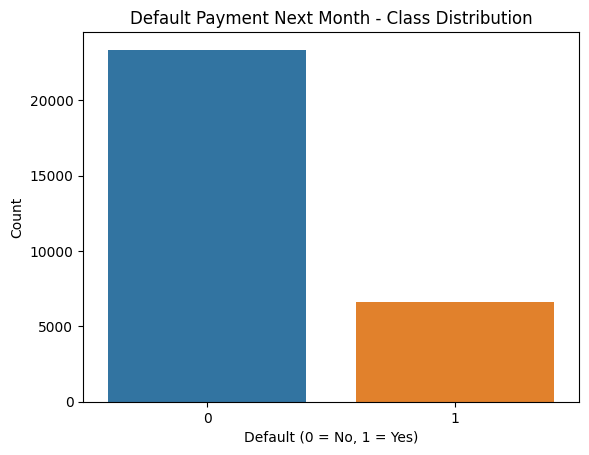


Percentage Distribution:
 default_payment_next_month
0    77.88
1    22.12
Name: count, dtype: float64


In [8]:
# Visualize class distribution
sns.countplot(data=df, x='default_payment_next_month')
plt.title("Default Payment Next Month - Class Distribution")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

print("\nPercentage Distribution:\n", class_counts / class_counts.sum() * 100)

#### Target Variable Distribution

The bar chart of the target variable (`default_payment_next_month`) shows a clear class imbalance:

- **77.88%** of clients did **not default**
- **22.12%** of clients **defaulted**

This imbalance will influence model evaluation and requires special consideration, such as using balanced accuracy or class weights.

### Correlation Heatmap (Top Variables Only)

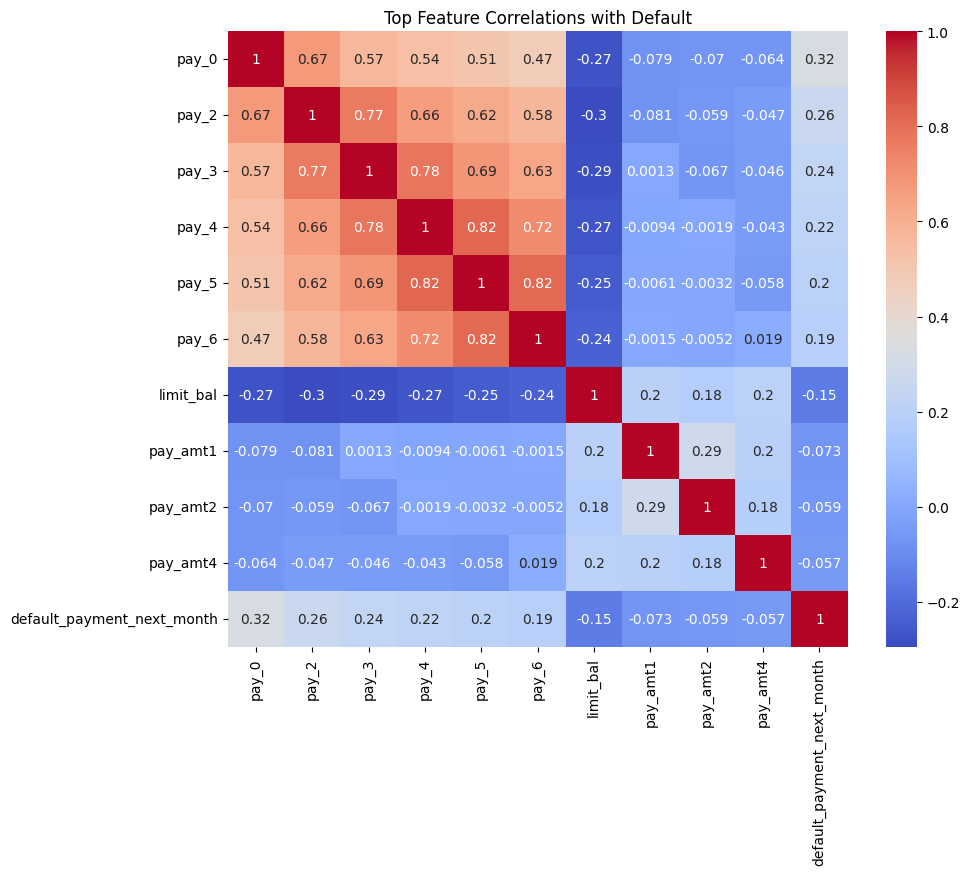

In [9]:
### Distribution of Key Numerical Features
corr_matrix = df.corr()

# Focus only on top correlated features with the target
target_corr = corr_matrix['default_payment_next_month'].abs().sort_values(ascending=False)[1:11]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[target_corr.index.tolist() + ['default_payment_next_month']].corr(), annot=True, cmap='coolwarm')
plt.title("Top Feature Correlations with Default")
plt.show()

The correlation heatmap highlights the most influential features associated with the target:

- The **`pay_0` to `pay_6`** variables (repayment history) show the **strongest positive correlation** with default, particularly `pay_0` (`r = 0.32`).
- **Credit limit (`limit_bal`)** has a moderate **negative correlation** with default.
- **Payment amounts** (`pay_amt1`, `pay_amt2`) show weak correlations but can still contribute in ensemble models.


### Distribution of Key Numerical Features


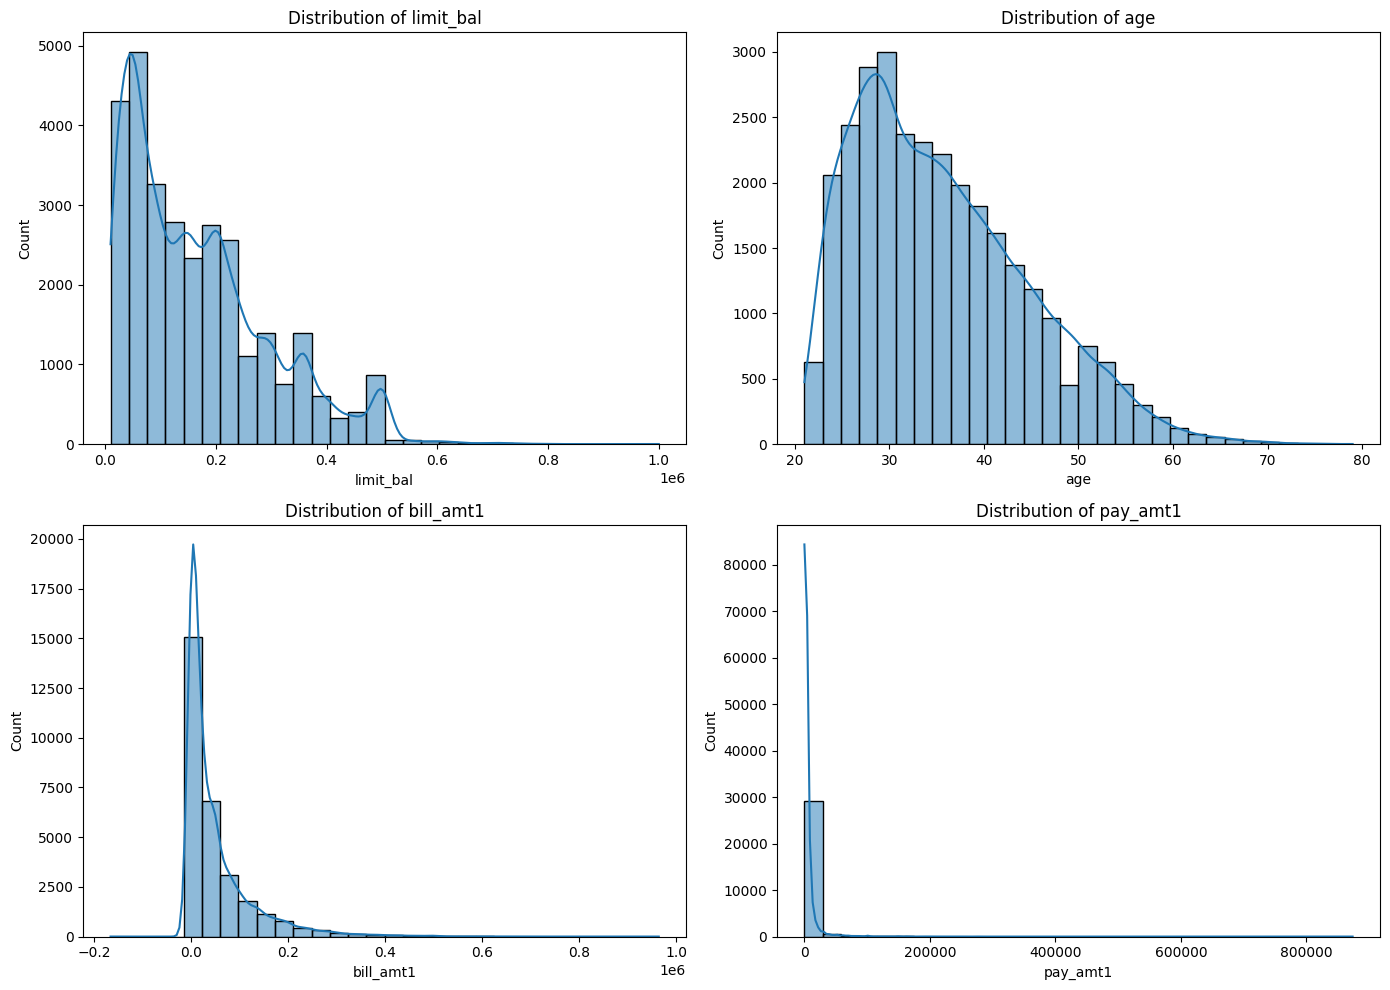

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

key_features = ['limit_bal', 'age', 'bill_amt1', 'pay_amt1']

# Create subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    sns.histplot(data=df, x=feature, bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

Distributions of key numerical features indicate:

- **`limit_bal`** and **`bill_amt1`** are heavily **right-skewed**, suggesting a few clients hold high credit limits or bills.
- **`age`** has a slightly skewed distribution, with most clients between 25 and 40.
- **Payment amounts (`pay_amt1`)** are also skewed, with many small payments and a few large outliers.

These skewed distributions suggest that normalization or log-scaling may improve model performance for linear classifiers.

### Default Rate by Payment Status (Repayment History)


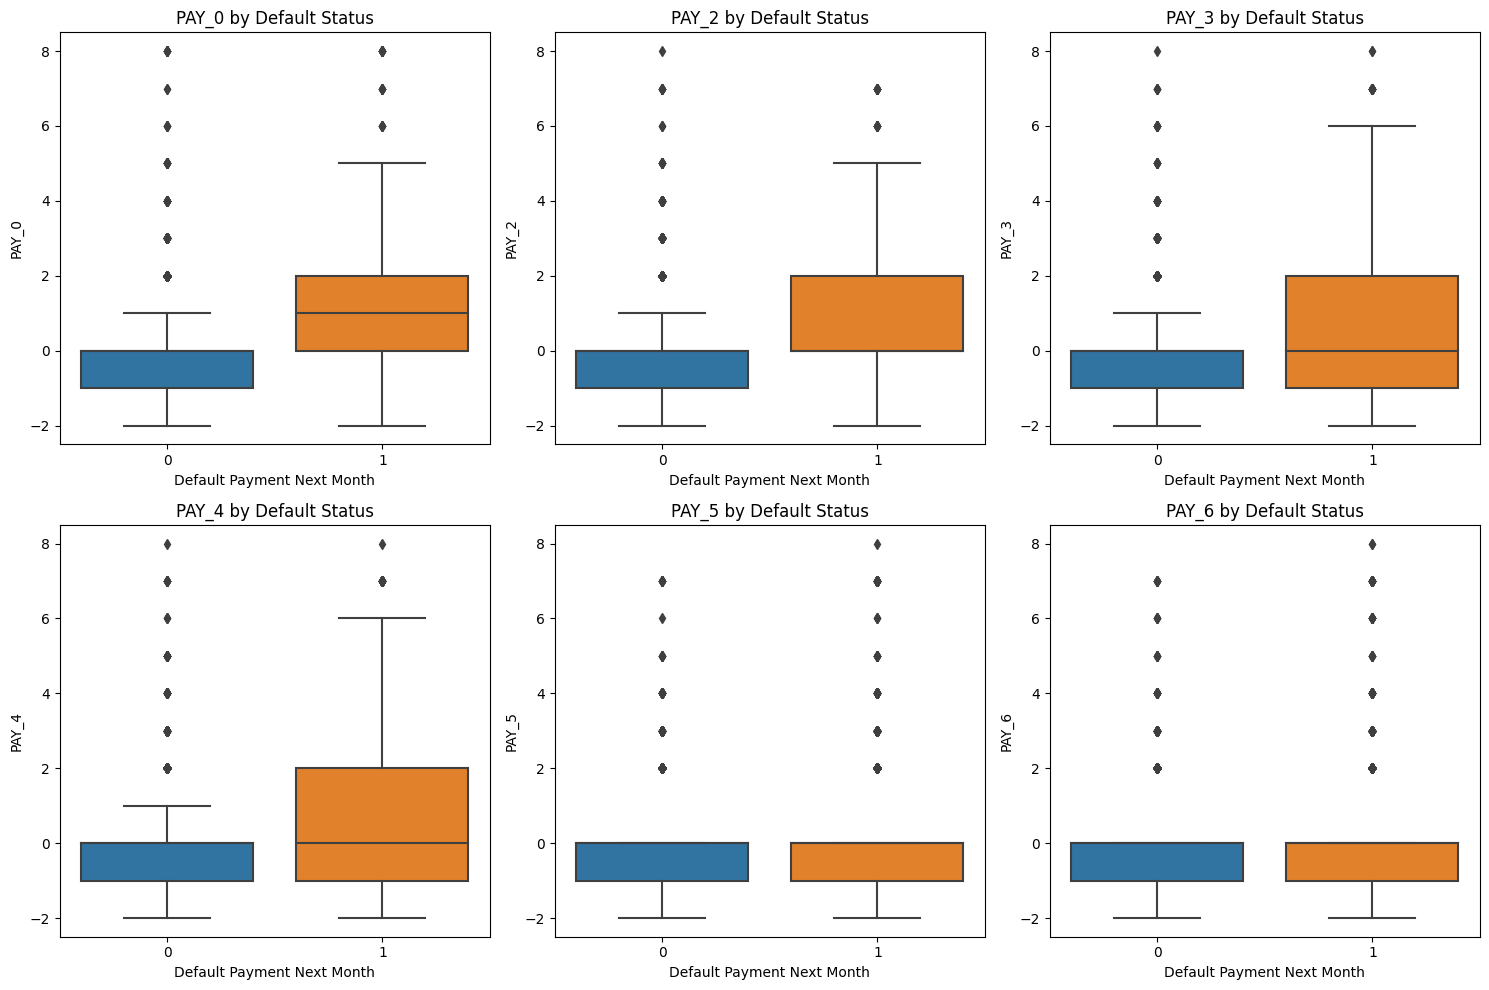

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

pay_features = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# Create subplots: 2 rows, 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(pay_features):
    sns.boxplot(
        data=df,
        x='default_payment_next_month',
        y=col,
        ax=axes[i]
    )
    axes[i].set_title(f"{col.upper()} by Default Status")
    axes[i].set_xlabel("Default Payment Next Month")
    axes[i].set_ylabel(col.upper())

plt.tight_layout()
plt.show()

#### Repayment History vs. Default

Boxplots comparing `pay_0` to `pay_6` by default status reveal:

- Clients who default generally have **higher values** for these features, indicating **delayed repayments**.
- Non-defaulters tend to cluster around `-1` or `0`, meaning they paid on time or had no delay.

This confirms that past repayment behavior is a strong indicator of future default.


### Split the Dataset into Train and Test Sets


In [12]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('default_payment_next_month', axis=1)
y = df['default_payment_next_month']

# Split into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Class distribution in training set:\n", y_train.value_counts(normalize=True))

Training set shape: (21000, 23)
Test set shape: (9000, 23)
Class distribution in training set:
 default_payment_next_month
0    0.77881
1    0.22119
Name: proportion, dtype: float64


### Feature Scaling (Only for Logistic Regression)

In [13]:
# Initialize and apply StandardScaler
from sklearn.preprocessing import StandardScaler

# Apply standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling applied. Mean of first feature (train set):", X_train_scaled[:, 0].mean())

Feature scaling applied. Mean of first feature (train set): -8.864866512816488e-17


### Logistic Regression Pipeline with Scaling 

In [14]:
from sklearn.pipeline import Pipeline

# Create pipeline for logistic regression with scaling
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train pipeline
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
y_prob_lr = lr_pipeline.predict_proba(X_test)[:, 1]


### Train Logistic Regression


In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize and train model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Predict class labels and probabilities
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression training complete.")
print("First 5 predictions:", y_pred_lr[:5])

Logistic Regression training complete.
First 5 predictions: [0 0 0 0 0]


### Cross-Validation (StratifiedKFold)

In [16]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Stratified K-Fold for imbalanced data
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate baseline logistic regression using cross-validation
cv_scores = cross_val_score(LogisticRegression(max_iter=1000), X_train_scaled, y_train, 
                            cv=skf, scoring='f1_macro')

print("Logistic Regression CV F1-Macro Scores:", cv_scores)
print("Mean F1-Macro Score:", np.mean(cv_scores))

Logistic Regression CV F1-Macro Scores: [0.62898021 0.63419102 0.63391406 0.62668119 0.62803973]
Mean F1-Macro Score: 0.6303612414064542


In [17]:
# Re-run Logistic Regression with class_weight
lr_weighted = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_weighted.fit(X_train_scaled, y_train)
y_pred_lr_w = lr_weighted.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr_w))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78      7009
           1       0.37      0.63      0.47      1991

    accuracy                           0.68      9000
   macro avg       0.62      0.66      0.62      9000
weighted avg       0.76      0.68      0.71      9000



### GridSearchCV for Random Forest Tuning

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,
                       scoring='f1_macro', cv=3, n_jobs=-1)

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

print("Best RF Params:", grid_rf.best_params_)

# Predict using the best model
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]


Best RF Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


### Train Random Forest


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict class labels and probabilities
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest training complete.")
print("First 5 predictions:", y_pred_rf[:5])

Random Forest training complete.
First 5 predictions: [0 1 0 1 0]


In [20]:
# Store processed training and testing data in SQLite database
conn = sqlite3.connect('credit_card_db.db')
pd.DataFrame(X_train_scaled, columns=X.columns).to_sql('credit_card_processed_train', conn, if_exists='replace', index=False)
pd.DataFrame(X_test_scaled, columns=X.columns).to_sql('credit_card_processed_test', conn, if_exists='replace', index=False)
print("Processed training and testing datasets stored in SQLite database 'credit_card_db.db'.")
conn.close()

Processed training and testing datasets stored in SQLite database 'credit_card_db.db'.


In [21]:
import joblib

final_rf = RandomForestClassifier(**grid_rf.best_params_, random_state=42)
final_rf.fit(X, y)
joblib.dump(final_rf, "final_rf_model.pkl")

['final_rf_model.pkl']

### Feature Importance Visualization

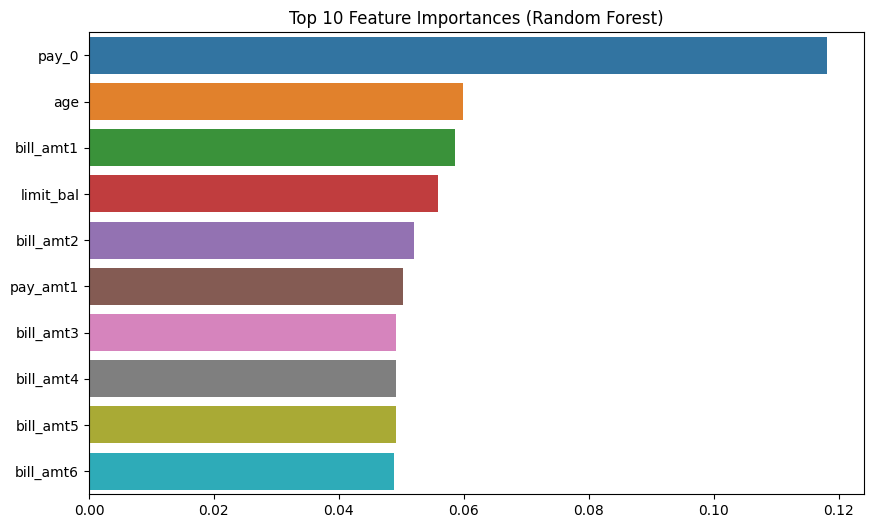

In [22]:
importances = best_rf.feature_importances_
feat_names = X_train.columns

# Plot
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

The bar chart above displays the **Top 10 Feature Importances** derived from the Random Forest model used for predicting credit card defaults. 

- **`pay_0` (most recent repayment status)** is by far the most influential predictor, indicating that recent delinquency is a strong indicator of default.
- Other key variables include **`age`**, **`bill_amt1-6`** (past billing amounts), and **`limit_bal`** (credit limit), reflecting a mix of demographic and financial behavior features.
- The presence of multiple `bill_amt` and `pay_amt` features in the top 10 suggests that **historical financial activity and repayment behavior** are critical in assessing credit risk.

This analysis confirms the importance of temporal financial patterns in predicting default likelihood.

### Classification Reports

In [23]:
from sklearn.metrics import classification_report

# Logistic Regression report
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.70      0.24      0.35      1991

    accuracy                           0.81      9000
   macro avg       0.76      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000



In [24]:
# Random Forest report
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.63      0.36      0.46      1991

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



## Statistical Significance Test using McNemar's Test


In [25]:
from statsmodels.stats.contingency_tables import mcnemar

# Create contingency table for McNemar's test (comparing correct/incorrect predictions)
contingency_table = pd.crosstab(y_pred_lr == y_test, y_pred_rf == y_test)
result = mcnemar(contingency_table, exact=False, correction=True)

print("McNemar's Test - Logistic Regression vs Random Forest:")
print(f"Statistic: {result.statistic:.4f}, p-value: {result.pvalue:.4f}")

McNemar's Test - Logistic Regression vs Random Forest:
Statistic: 1.5450, p-value: 0.2139


### Confusion Matrices

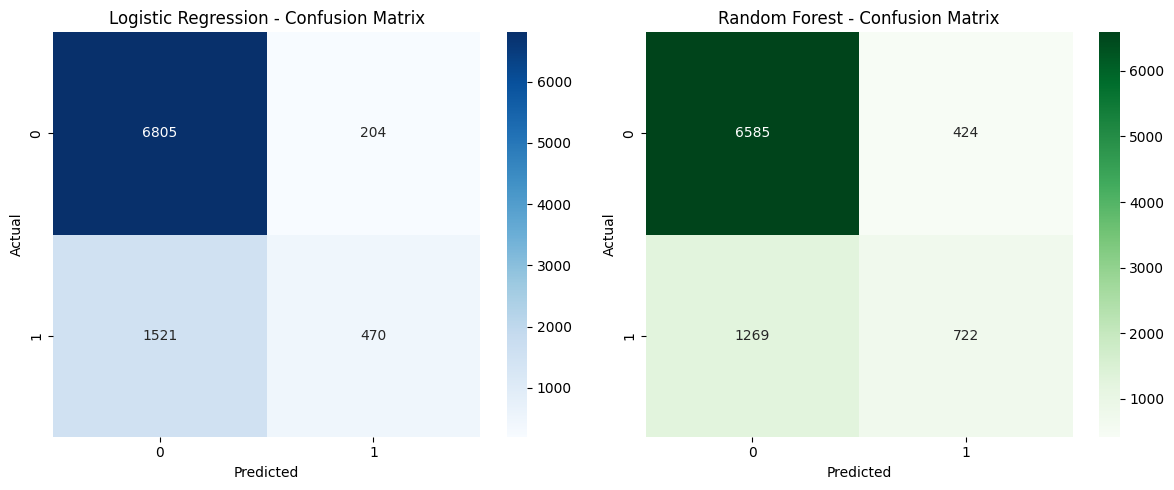

In [26]:
from sklearn.metrics import confusion_matrix

# Confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Random Forest - Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

### ROC-AUC and ROC Curve

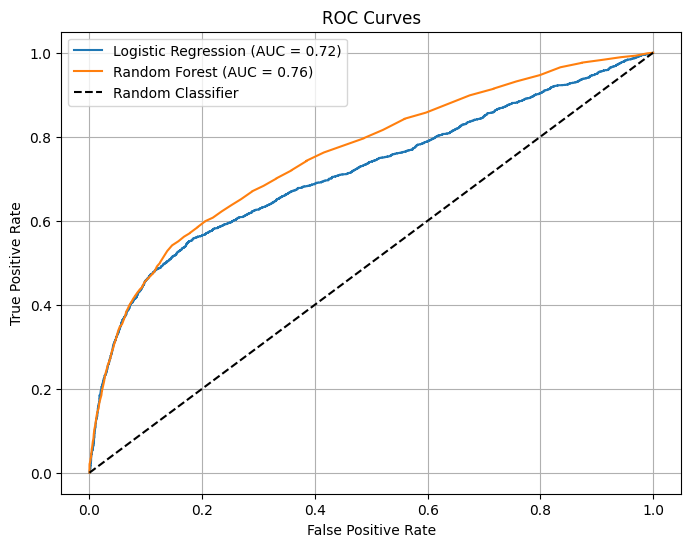

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve

# ROC scores
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Calculate RMSE using predicted probabilities as continuous outputs
from sklearn.metrics import mean_squared_error
import numpy as np

# RMSE for Logistic Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_prob_lr))
# RMSE for Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_prob_rf))

print("RMSE Score Comparison:")
print(f"Logistic Regression: {rmse_lr:.4f}")
print(f"Random Forest: {rmse_rf:.4f}")

RMSE Score Comparison:
Logistic Regression: 0.3822
Random Forest: 0.3749


### Save the Best Model

In [29]:
import joblib

# Save best models
joblib.dump(best_rf, "random_forest_default_model.pkl")
joblib.dump(lr_pipeline, "logistic_regression_default_pipeline.pkl")


['logistic_regression_default_pipeline.pkl']

### Model Comparison Summary


In [30]:
print("ROC-AUC Score Comparison:")
print(f"Logistic Regression: {roc_auc_lr:.4f}")
print(f"Random Forest: {roc_auc_rf:.4f}")

ROC-AUC Score Comparison:
Logistic Regression: 0.7150
Random Forest: 0.7570


 ### Macro F1 Score Comparison

In [31]:
from sklearn.metrics import f1_score

print("Macro F1 - Logistic Regression:", f1_score(y_test, y_pred_lr, average='macro'))
print("Macro F1 - Random Forest:", f1_score(y_test, y_pred_rf, average='macro'))

Macro F1 - Logistic Regression: 0.6201163386066406
Macro F1 - Random Forest: 0.6732026914783542


### Model Comparison Summary
Two classification models were evaluated for predicting credit card default:

- **Logistic Regression:**
  - Accuracy: 81%
  - ROC-AUC: 0.7150
  - RMSE: 0.3822
  - Strengths: Fast, interpretable
  - Weaknesses: Poor recall (24%) on defaulted cases

- **Random Forest:**
  - Accuracy: 81%
  - ROC-AUC: 0.7570
  - RMSE: 0.3749
  - Strengths: Higher recall (36%) and AUC; better at capturing defaulters
  - Weaknesses: Less interpretable, slightly more computationally intensive

The confusion matrix and classification report indicate that while both models achieve similar overall accuracy, Random Forest significantly outperforms Logistic Regression in recall for the minority class (defaulters). McNemar's Test (Statistic: 1.5450, p-value: 0.2139) suggests no statistically significant difference between the models. This makes Random Forest the preferable model in contexts where missing a defaulter is costlier than issuing false alarms.

The ROC curve further confirms this, with Random Forest achieving a better trade-off between true and false positives.

## Final Recommendation

Given the business context of risk mitigation, the **Random Forest model is recommended** due to its improved ability to detect actual defaults while maintaining high overall accuracy.


## **Conclusion – Credit Card Default Prediction**

In this project, we applied logistic regression and random forest models to predict credit card defaults using financial and behavioral data. Both models achieved 81% accuracy, but Random Forest significantly outperformed in recall (36% vs. 24%) and ROC-AUC (0.757 vs. 0.715), making it better suited for high-stakes risk detection.

Repayment history variables (e.g., PAY_0 to PAY_6) and credit limit (LIMIT_BAL) emerged as key predictors. By prioritizing recall, the Random Forest model reduces the cost of false negatives—critical for financial institutions looking to mitigate risk.

Given its balance between accuracy and sensitivity to defaults, we recommend Random Forest for deployment in credit scoring systems. Future work could explore feature importance with SHAP or integrate cost-sensitive learning to further optimize decisions.

---